In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error, confusion_matrix, ConfusionMatrixDisplay

In [2]:
EXAM_NAMES = ['Kuis 2', 'UTS']
EXAM_NUMBERS = {
    'Kuis 2': ['IA', 'IB', 'IC'],
    'UTS': ['IA', 'IB']
}
EXAMS = []
for exam_name in EXAM_NAMES:
    for exam_number in EXAM_NUMBERS[exam_name]:
        EXAMS.append((exam_name, exam_number))

LB = {
    'All': 0.6562801963,
    'Kuis 2 IA': 0.1447276516,
    'Kuis 2 IB': 0.3178719202,
    'Kuis 2 IC': 0.6346878475,
    'UTS IA': 0.5107134316,
    'UTS IB': 0.4047760493
}

X_AXIS = 'nilai autograder'
Y_AXIS = 'nilai manual'
EPS = 0.001

import os 
import sys

module_path = os.path.abspath(os.path.join('..')) 
if module_path not in sys.path: 
    sys.path.append(module_path) 
    
from grader.src.ged.classes.general_cost_function import RelabelMethod
from grader.src.grader import Grader, GraphPreprocessType

REAL_GRADE_FILENAME = 'Real Results.csv' 
AFILE_PREFIX = 'Grade_'

real_dataframe = pd.read_csv(REAL_GRADE_FILENAME)
dataframes = {}
# for node_cost in range(1, 4):
#     for edge_cost in range(1, 4):
#         if node_cost == edge_cost and node_cost != 1:
#             continue
#         for relabel_method in RelabelMethod.__iter__():
#             for graph_preprocess_type in GraphPreprocessType.__iter__():
#                 for suff in ['', '_APR']:
#                     filename = get_afilename(f'{relabel_method.name}_{graph_preprocess_type.name}_C{node_cost}{edge_cost}{suff}.csv')
#                     if filename not in os.listdir('./'):
#                         continue
#                     dataframes[filename] = pd.read_csv(filename).rename(columns={'grade': 'nilai autograder'})
#                     dataframes[filename] = pd.merge(dataframes[filename], real_dataframe, on=['nim', 'exam_name', 'number'])

for node_cost in range(1, 4):
    for edge_cost in range(1, 4):
        if node_cost == edge_cost and node_cost != 1:
            continue
        for relabel_method in RelabelMethod.__iter__():
            for graph_preprocess_type in GraphPreprocessType.__iter__():
                for pref in ['', 'APR_']:
                    filename = f'{pref}Grade_{relabel_method.name}_{graph_preprocess_type.name}_C{node_cost}{edge_cost}.csv'
                    if filename not in os.listdir('./'):
                        continue
                    dataframes[filename] = pd.read_csv(filename).rename(columns={'grade': 'nilai autograder'})
                    dataframes[filename] = pd.merge(dataframes[filename], real_dataframe, on=['nim', 'exam_name', 'number'])

In [3]:
# Correlation function
def correlation(df):
    return df.corr()

In [4]:
# MAE (Mean Absolute Error) function
def mae(df):
    return mean_absolute_error(df[X_AXIS], df[Y_AXIS])

In [5]:
# Linear Regression Plot function
def linear_regression_plot(name, df):
    m, b = np.polyfit(df[X_AXIS], df[Y_AXIS], 1)
    print(f'Info for plot={name}: m={m}, b={b}')
    fig, ax = plt.subplots(figsize=(8, 8), dpi=60)
    ax.scatter(df[X_AXIS], df[Y_AXIS])
    ax.set_title(f'Perbandingan Hasil Penilaian Menggunakan Sistem Autograder\n dan Hasil Penilaian Manual oleh Pendidik\n{name}')
    ax.set_xlabel('Hasil Penilaian Menggunakan Sistem Autograder')
    ax.set_ylabel('Hasil Penilaian Manual oleh Pendidik')
    ax.set_xlim([0, 100])
    ax.set_ylim([0, 100])
    ax.set_aspect(1)
    ax.plot(df[Y_AXIS], m * df[Y_AXIS] + b)
    plt.show()

In [6]:
# Confusion Matrix Plot function
def confusion_matrix_plot(name, df):
    bins = [10 * x - EPS for x in range(11)] + [100 + EPS]
    labels = range(11)

    cat_X = pd.cut(df[X_AXIS], bins=bins, labels=labels)
    cat_Y = pd.cut(df[Y_AXIS], bins=bins, labels=labels)
    categorized_grade = pd.concat([cat_X, cat_Y], axis=1)
    
    cm = confusion_matrix(categorized_grade[X_AXIS], categorized_grade[Y_AXIS], labels=labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    fig, ax = plt.subplots(figsize=(10, 8), dpi=60)
    ax.set_title(f'Confusion Matrix Perbandingan Hasil Penilaian Menggunakan Sistem Autograder\n dan Hasil Penilaian Manual oleh Pendidik\n{name}')
    disp.plot(ax=ax)
    disp.ax_.set(xlabel=X_AXIS, ylabel=Y_AXIS)
    plt.show()

In [7]:
# Print Correlations
all_correls = {}
correls = []
for name, df in dataframes.items():
    corr = correlation(df)
    correls.append((corr[X_AXIS][Y_AXIS], name))
    all_correls[name] = {}
    all_correls[name]['All'] = corr[X_AXIS][Y_AXIS]
    
correls.sort(reverse=True)
for corr, name in correls:
    print(f'{name}: {corr}')

Grade_BOOLEAN_COUNT_UNCOLLAPSE_C31.csv: 0.7549243376548952
Grade_BOOLEAN_COUNT_UNCOLLAPSE_C21.csv: 0.7450575795942429
Grade_NONE_UNCOLLAPSE_C31.csv: 0.7449776532642571
Grade_NONE_UNCOLLAPSE_C21.csv: 0.7371931649705262
Grade_BOOLEAN_COUNT_UNCOLLAPSE_C32.csv: 0.7361385296726325
Grade_NONE_UNCOLLAPSE_C32.csv: 0.7292346551031936
Grade_BOOLEAN_COUNT_UNCOLLAPSE_C11.csv: 0.7250149785514957
Grade_NONE_UNCOLLAPSE_C11.csv: 0.7168720779498187
Grade_BOOLEAN_COUNT_UNCOLLAPSE_C23.csv: 0.711559158708328
Grade_NONE_UNCOLLAPSE_C23.csv: 0.7059701874597814
Grade_COUNTER_COLLAPSE_NBE_C31.csv: 0.7051034258853478
Grade_BOOLEAN_COUNT_UNCOLLAPSE_C12.csv: 0.7031645996037769
Grade_DAMERAU_LD_COLLAPSE_C31.csv: 0.6951334806478081
Grade_NONE_UNCOLLAPSE_C12.csv: 0.6948790033541328
Grade_COUNTER_COLLAPSE_C31.csv: 0.6947708703570076
Grade_BOOLEAN_COUNT_UNCOLLAPSE_C13.csv: 0.6944170935925835
Grade_NONE_UNCOLLAPSE_C13.csv: 0.6908476491502543
APR_Grade_BOOLEAN_COUNT_UNCOLLAPSE_C31.csv: 0.689574556131414
APR_Grade_NONE_U

In [8]:
exam_correls = {}
for exam in EXAMS:
    exam_correls[exam] = []
    for _, name in correls:
        df = dataframes[name]
        corr = correlation(df.loc[(df['exam_name'] == exam[0]) & (df['number'] == exam[1])])
        exam_correls[exam].append((corr[X_AXIS][Y_AXIS], name))
        all_correls[name][f'{exam[0]} {exam[1]}'] = corr[X_AXIS][Y_AXIS]
    exam_correls[exam].sort(reverse=True)
    
for exam in EXAMS:
    for corr, name in exam_correls[exam][:10]:
        print(f'{exam} {name}:\n {corr}', '\n-----\n')
    print('\n\n\n')
# for _, name in correls[90: 120]:
#     df = dataframes[name]
#     for exam in EXAMS:
#         corr = correlation(df.loc[(df['exam_name'] == exam[0]) & (df['number'] == exam[1])])
#         print(f'{exam} {name}:\n {corr[X_AXIS][Y_AXIS]}', '\n-----\n')

('Kuis 2', 'IA') Grade_NONE_PROPAGATE_BRANCHING_C13.csv:
 0.18647716445483423 
-----

('Kuis 2', 'IA') Grade_NONE_COLLAPSE_NBE_C12.csv:
 0.18253791788463208 
-----

('Kuis 2', 'IA') Grade_NONE_COLLAPSE_NBE_C13.csv:
 0.1824913065681625 
-----

('Kuis 2', 'IA') Grade_NONE_COLLAPSE_NBE_C23.csv:
 0.18197626166639672 
-----

('Kuis 2', 'IA') Grade_NONE_PROPAGATE_BRANCHING_C12.csv:
 0.18128293683870964 
-----

('Kuis 2', 'IA') Grade_NONE_COLLAPSE_NBE_C11.csv:
 0.18042228579793665 
-----

('Kuis 2', 'IA') Grade_NONE_COLLAPSE_NBE_C32.csv:
 0.17829647465215356 
-----

('Kuis 2', 'IA') Grade_NONE_COLLAPSE_NBE_C21.csv:
 0.17667914161348816 
-----

('Kuis 2', 'IA') Grade_NONE_PROPAGATE_BRANCHING_C23.csv:
 0.17565419811015293 
-----

('Kuis 2', 'IA') Grade_NONE_COLLAPSE_NBE_C31.csv:
 0.1745212837662337 
-----





('Kuis 2', 'IB') Grade_BOOLEAN_COUNT_UNCOLLAPSE_C23.csv:
 0.6031040549564886 
-----

('Kuis 2', 'IB') Grade_BOOLEAN_COUNT_UNCOLLAPSE_C12.csv:
 0.600841574129304 
-----

('Kuis 2', 'IB') G

In [9]:
for name, all_corr in all_correls.items():
    print(f'{name}:')
    for exam, corr in all_corr.items():
        print(f'{exam}: {corr}')
    print('\n')

Grade_NONE_UNCOLLAPSE_C11.csv:
All: 0.7168720779498187
Kuis 2 IA: -0.1498997440810635
Kuis 2 IB: 0.4832269677852789
Kuis 2 IC: 0.6619171177283789
UTS IA: 0.34101680476335366
UTS IB: 0.26158377472777095


APR_Grade_NONE_UNCOLLAPSE_C11.csv:
All: 0.6848532040105724
Kuis 2 IA: -0.15213427191222773
Kuis 2 IB: 0.4600456460094974
Kuis 2 IC: 0.6500554287485432
UTS IA: 0.38081349792210134
UTS IB: 0.2915045421789954


Grade_NONE_COLLAPSE_C11.csv:
All: 0.6242814140350493
Kuis 2 IA: 0.12357335381800219
Kuis 2 IB: 0.30920232724037766
Kuis 2 IC: 0.47542518988079185
UTS IA: 0.5701844029175446
UTS IB: 0.5397599812847885


APR_Grade_NONE_COLLAPSE_C11.csv:
All: 0.6655327185332549
Kuis 2 IA: 0.1258964067109781
Kuis 2 IB: 0.34718903526991307
Kuis 2 IC: 0.6450660497185712
UTS IA: 0.5861941180635524
UTS IB: -0.02910374149619204


Grade_NONE_COLLAPSE_NBE_C11.csv:
All: 0.6416554205057077
Kuis 2 IA: 0.18042228579793665
Kuis 2 IB: -0.11966473670815904
Kuis 2 IC: 0.6281952089202785
UTS IA: 0.4668900796143905
UTS

In [10]:
count_top = {}
for exam in EXAMS:
#     for corr, name in exam_correls[exam][:70]:
#         if name not in count_top:
#             count_top[name] = 0
#         count_top[name] += 1
    for corr, name in exam_correls[exam]:
        if corr >= LB[f'{exam[0]} {exam[1]}'] * 0.8:
            if name not in count_top:
                count_top[name] = 0
            count_top[name] += 1
    
top_name = [x for x in count_top.items()]
top_name.sort(reverse=True, key=lambda x: (x[1], all_correls[x[0]]['All']))
vis = {}
for name, count in top_name:
    if count not in vis:
        vis[count] = 0
    if vis[count] >= 3:
        continue
    print(f'{name}: {count}')
#     print(all_correls[name])
    for exam, corr in all_correls[name].items():
        print(f'{exam}: {corr}')
    print()
    vis[count] += 1

Grade_DAMERAU_LD_COLLAPSE_C31.csv: 5
All: 0.6951334806478081
Kuis 2 IA: 0.1183072028870086
Kuis 2 IB: 0.2571474962352775
Kuis 2 IC: 0.610626603790905
UTS IA: 0.48727095436600887
UTS IB: 0.3507775548387196

Grade_BOOLEAN_COUNT_COLLAPSE_C21.csv: 5
All: 0.6692879439706731
Kuis 2 IA: 0.12665743191666284
Kuis 2 IB: 0.2809693091106426
Kuis 2 IC: 0.5882188303708652
UTS IA: 0.4254769784383576
UTS IB: 0.3913569272442022

APR_Grade_DAMERAU_LD_COLLAPSE_NBE_C32.csv: 5
All: 0.6684279448690417
Kuis 2 IA: 0.13766418223429272
Kuis 2 IB: 0.36751476167742914
Kuis 2 IC: 0.6350158331818712
UTS IA: 0.490409149555743
UTS IB: 0.3827626692037839

Grade_COUNTER_COLLAPSE_C31.csv: 4
All: 0.6947708703570076
Kuis 2 IA: 0.10589504159795335
Kuis 2 IB: 0.29172935875724476
Kuis 2 IC: 0.6391969338339393
UTS IA: 0.4716664690312982
UTS IB: 0.32711063759959197

Grade_DAMERAU_LD_COLLAPSE_NBE_C31.csv: 4
All: 0.6860547893897011
Kuis 2 IA: 0.145208415452916
Kuis 2 IB: -0.03429350959490823
Kuis 2 IC: 0.6229606937627122
UTS IA:

In [11]:
# Print MAE
# for name, df in dataframes.items():
#     print(f'MAE (Mean Absolute Error) of dataframe {name} exam: {mae(df)}')
    
maes = []
for name, df in dataframes.items():
    maes.append((mae(df), name))
maes.sort()
for mae, name in maes:
    print(f'{name}: {mae}')

APR_Grade_DAMERAU_LD_COLLAPSE_C32.csv: 11.73338139417703
APR_Grade_COUNTER_COLLAPSE_C32.csv: 11.75580734333139
APR_Grade_DAMERAU_LD_COLLAPSE_C21.csv: 11.767984707206033
APR_Grade_COUNTER_COLLAPSE_C21.csv: 11.836250547753211
APR_Grade_DAMERAU_LD_PROPAGATE_BRANCHING_C32.csv: 11.849322411739363
APR_Grade_NONE_PROPAGATE_BRANCHING_C23.csv: 11.865442140961552
APR_Grade_DAMERAU_LD_PROPAGATE_BRANCHING_C11.csv: 11.882541074699228
APR_Grade_BOOLEAN_COUNT_COLLAPSE_C32.csv: 11.883468996066682
APR_Grade_DAMERAU_LD_PROPAGATE_BRANCHING_C21.csv: 11.891401889595882
APR_Grade_NONE_PROPAGATE_BRANCHING_C11.csv: 11.891982423041718
APR_Grade_COUNTER_COLLAPSE_C11.csv: 11.903775633319887
APR_Grade_COUNTER_PROPAGATE_BRANCHING_C11.csv: 11.916650558221338
APR_Grade_DAMERAU_LD_COLLAPSE_C11.csv: 11.918125905594534
APR_Grade_COUNTER_PROPAGATE_BRANCHING_C32.csv: 11.926445034740203
APR_Grade_DAMERAU_LD_COLLAPSE_C31.csv: 11.940888385427339
APR_Grade_BOOLEAN_COUNT_COLLAPSE_C21.csv: 11.952384538312568
APR_Grade_BOOLEAN_

Linear Regression Plot of Grade_BOOLEAN_COUNT_UNCOLLAPSE_C31.csv exam:
Info for plot=Grade_BOOLEAN_COUNT_UNCOLLAPSE_C31.csv: m=0.7215774273119262, b=12.054136956169696


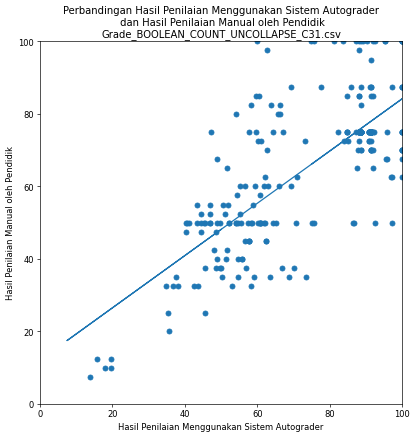

Linear Regression Plot of Grade_BOOLEAN_COUNT_UNCOLLAPSE_C21.csv exam:
Info for plot=Grade_BOOLEAN_COUNT_UNCOLLAPSE_C21.csv: m=0.6314924861482977, b=20.014711537633957


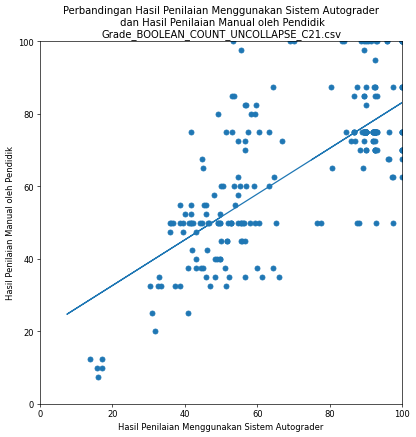

Linear Regression Plot of Grade_NONE_UNCOLLAPSE_C31.csv exam:
Info for plot=Grade_NONE_UNCOLLAPSE_C31.csv: m=0.693915122642896, b=12.546129735488405


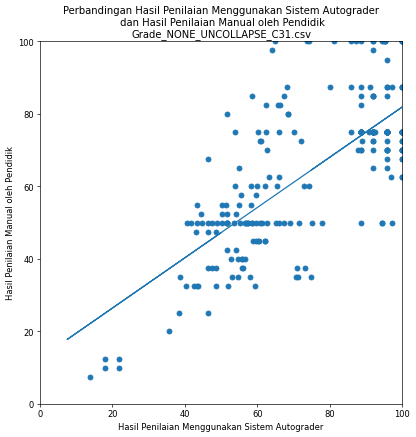

Linear Regression Plot of Grade_NONE_UNCOLLAPSE_C21.csv exam:
Info for plot=Grade_NONE_UNCOLLAPSE_C21.csv: m=0.6084285452926526, b=20.447690627006427


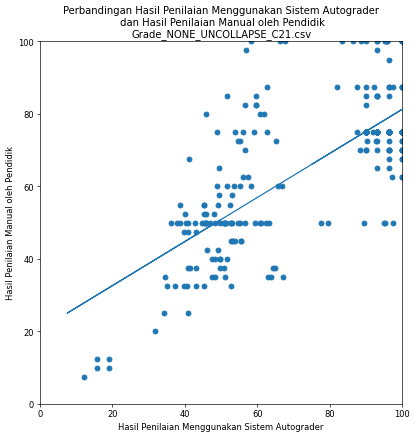

Linear Regression Plot of Grade_BOOLEAN_COUNT_UNCOLLAPSE_C32.csv exam:
Info for plot=Grade_BOOLEAN_COUNT_UNCOLLAPSE_C32.csv: m=0.5703620538246573, b=25.217766976828862


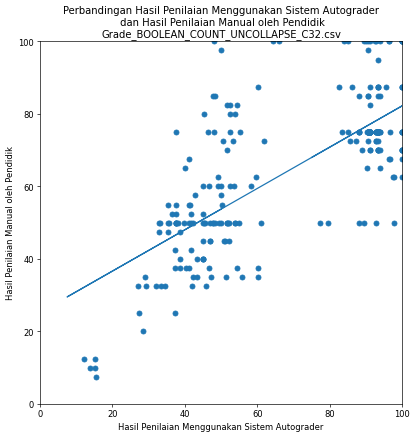

Linear Regression Plot of Grade_NONE_UNCOLLAPSE_C32.csv exam:
Info for plot=Grade_NONE_UNCOLLAPSE_C32.csv: m=0.5506359430602193, b=25.694705159951823


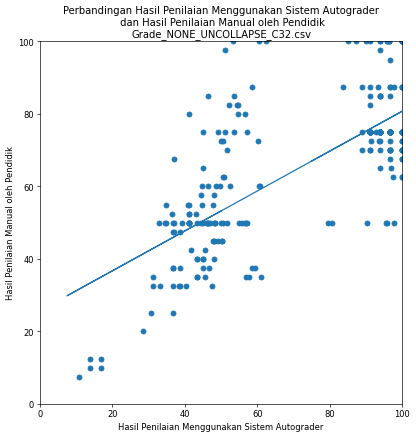

Linear Regression Plot of Grade_BOOLEAN_COUNT_UNCOLLAPSE_C11.csv exam:
Info for plot=Grade_BOOLEAN_COUNT_UNCOLLAPSE_C11.csv: m=0.49665576758018787, b=31.525435214759465


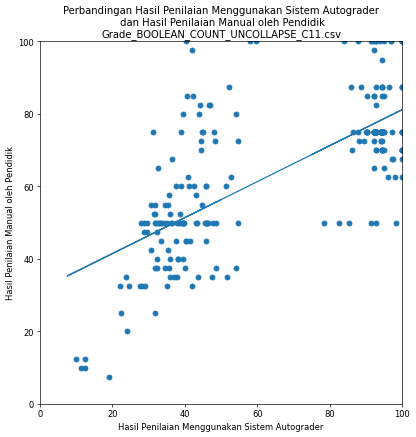

Linear Regression Plot of Grade_NONE_UNCOLLAPSE_C11.csv exam:
Info for plot=Grade_NONE_UNCOLLAPSE_C11.csv: m=0.4797739241913595, b=32.04010579179674


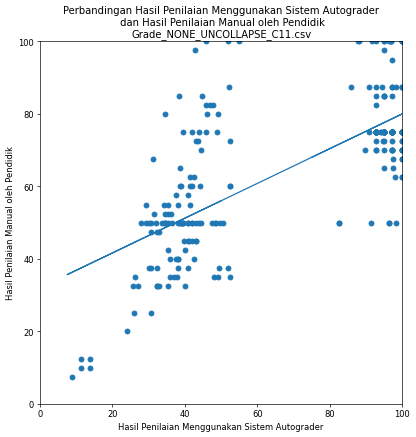

Linear Regression Plot of Grade_BOOLEAN_COUNT_UNCOLLAPSE_C23.csv exam:
Info for plot=Grade_BOOLEAN_COUNT_UNCOLLAPSE_C23.csv: m=0.4387191239351848, b=36.46434913646677


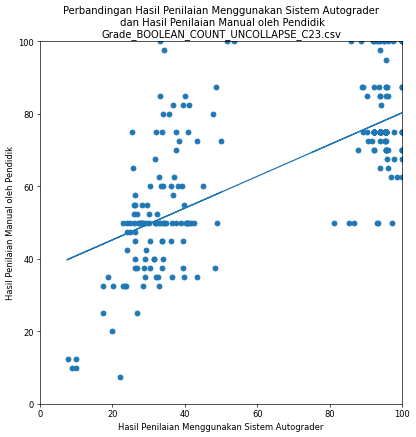

Linear Regression Plot of Grade_NONE_UNCOLLAPSE_C23.csv exam:
Info for plot=Grade_NONE_UNCOLLAPSE_C23.csv: m=0.4247963046062867, b=36.906684754220166


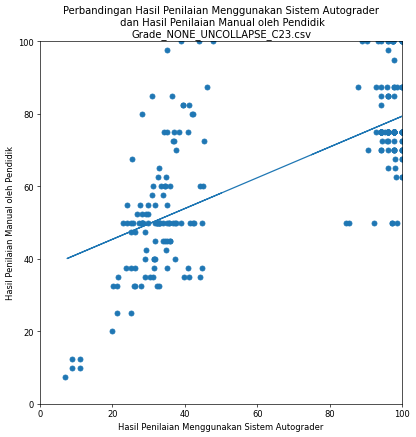

In [12]:
for _, name in correls[:10]:
    df = dataframes[name]
    print(f'Linear Regression Plot of {name} exam:')
    linear_regression_plot(name, df)

Confusion Matrix Plot of Grade_BOOLEAN_COUNT_UNCOLLAPSE_C31.csv exam:


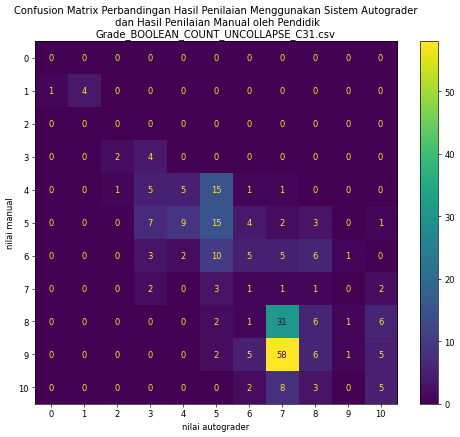

Confusion Matrix Plot of Grade_BOOLEAN_COUNT_UNCOLLAPSE_C21.csv exam:


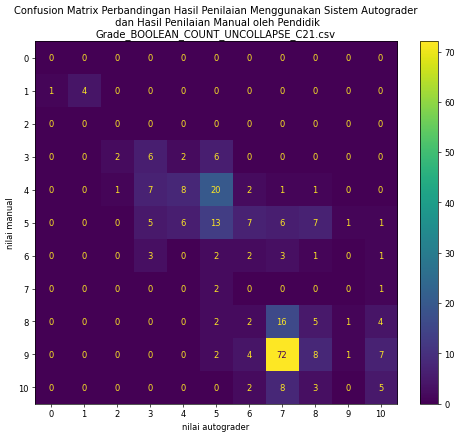

Confusion Matrix Plot of Grade_NONE_UNCOLLAPSE_C31.csv exam:


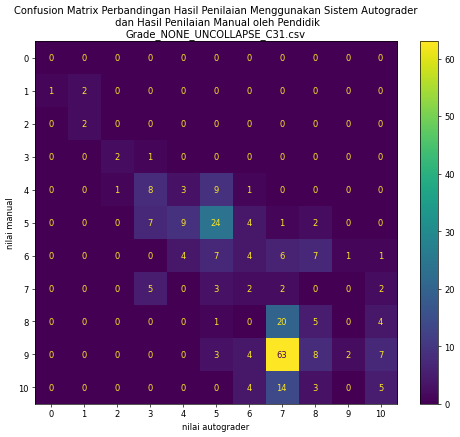

Confusion Matrix Plot of Grade_NONE_UNCOLLAPSE_C21.csv exam:


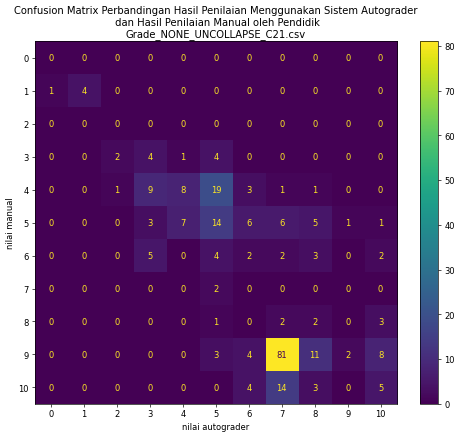

Confusion Matrix Plot of Grade_BOOLEAN_COUNT_UNCOLLAPSE_C32.csv exam:


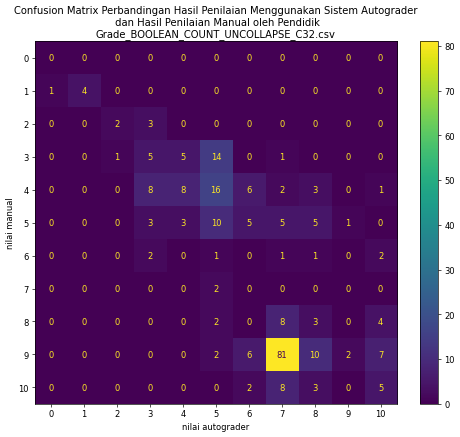

Confusion Matrix Plot of Grade_NONE_UNCOLLAPSE_C32.csv exam:


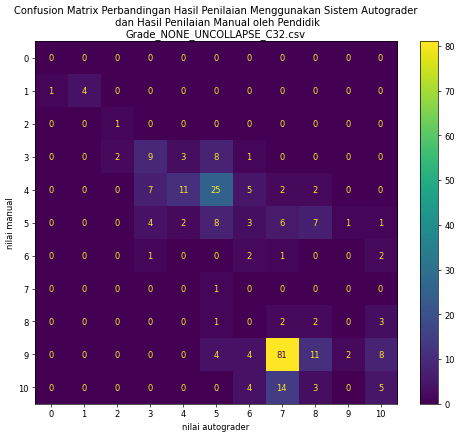

Confusion Matrix Plot of Grade_BOOLEAN_COUNT_UNCOLLAPSE_C11.csv exam:


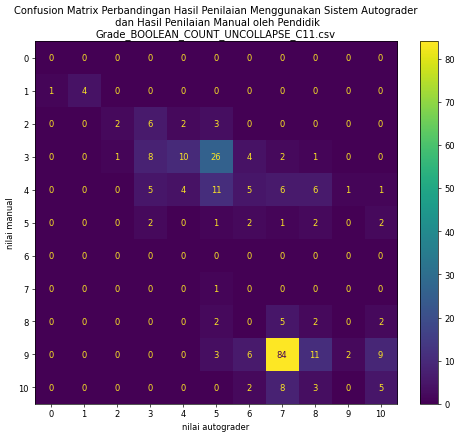

Confusion Matrix Plot of Grade_NONE_UNCOLLAPSE_C11.csv exam:


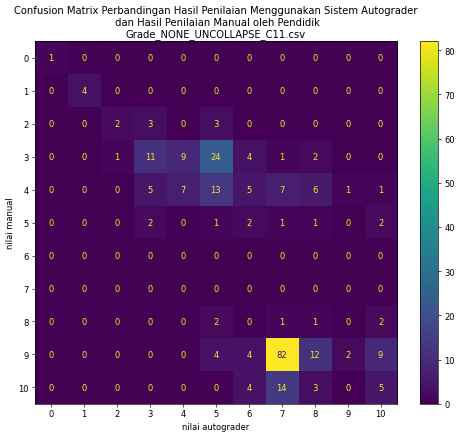

Confusion Matrix Plot of Grade_BOOLEAN_COUNT_UNCOLLAPSE_C23.csv exam:


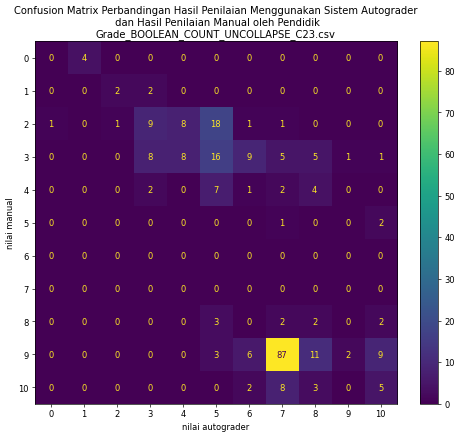

Confusion Matrix Plot of Grade_NONE_UNCOLLAPSE_C23.csv exam:


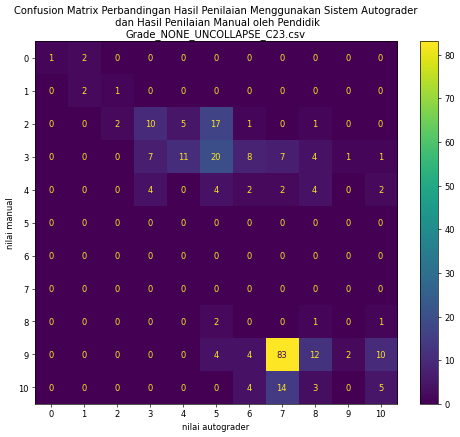

In [13]:
for _, name in correls[:10]:
    df = dataframes[name]
    print(f'Confusion Matrix Plot of {name} exam:')
    confusion_matrix_plot(name, df)